In [1]:
pip show opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install opencv-python

In [ ]:
pip install opencv-contrib-python
#If you want the “extra” modules (opencv_contrib) you can install:

In [ ]:
conda install -c conda-forge opencv

In [2]:
import cv2
print(cv2.__version__)

4.0.1


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.Installing collected packages: keras



You should consider upgrading via the 'C:\Users\Srividya\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)Note: you may need to restart the kernel to use updated packages.



  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl (276.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl (30 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached grpcio-1.70.0-cp38-cp38-win_amd64.whl (4.3 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-a


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.6.4 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.16.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
You should consider upgrading via the 'C:\Users\Srividya\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install numpy==1.23


  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Srividya\\Anaconda3\\Lib\\site-packages\\numpy\\~libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\Srividya\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import to_categorical
from keras.utils import to_categorical
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
y_train[0]  

5

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test,  num_classes=10)


In [11]:
model = Sequential()  
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))  
model.add(MaxPooling2D((2, 2)))  
model.add(Flatten())  
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))  
model.add(Dense(10, activation='softmax'))  
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [13]:
model.fit(X_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(X_test,y_test))  

Epoch 1/2
1875/1875 [==============================] - 26s 14ms/step - loss: 3.2597 - accuracy: 0.7748 - val_loss: 0.6326 - val_accuracy: 0.8050
Epoch 2/2
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4959 - accuracy: 0.8757 - val_loss: 0.3414 - val_accuracy: 0.9145


In [15]:
model.save("my_model.keras")


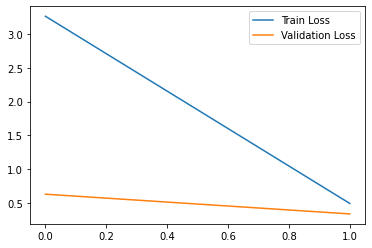

In [16]:
plt.plot(model.history.history['loss'], label='Train Loss')  
plt.plot(model.history.history['val_loss'], label='Validation Loss')  
plt.legend()  

In [18]:
from keras.models import load_model
# or if you are using TensorFlow's Keras:
# from tensorflow.keras.models import load_model

model = load_model("my_model.keras")


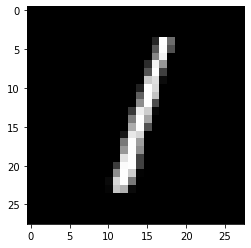

In [19]:
plt.imshow(X_test[2], cmap='gray')  

In [20]:
x = np.reshape(X_test[2], (1, 28, 28, 1))  
#x = x.astype('float32')  
#x /= 255  
np.argmax(model.predict(x))  

1/1 [==============================] - 0s 80ms/step


1

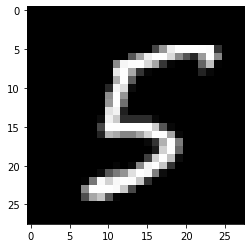

In [21]:
plt.imshow(X_test[23], cmap='gray')  
 

In [22]:
x = np.reshape(X_test[23], (1, 28, 28, 1))  
#x = x.astype('float32')  
#x /= 255  
np.argmax(model.predict(x))  

1/1 [==============================] - 0s 21ms/step


5

In [23]:
model.predict(x)

1/1 [==============================] - 0s 14ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6087642e-02,
        6.6995045e-09, 9.8379403e-01, 3.5955869e-10, 4.2610673e-30,
        2.0155303e-06, 1.1626091e-04]], dtype=float32)